Author: Sami Mwanje, 
mm223kk@student.lnu.se

In [74]:
import matplotlib.pyplot as plt
import numpy as np

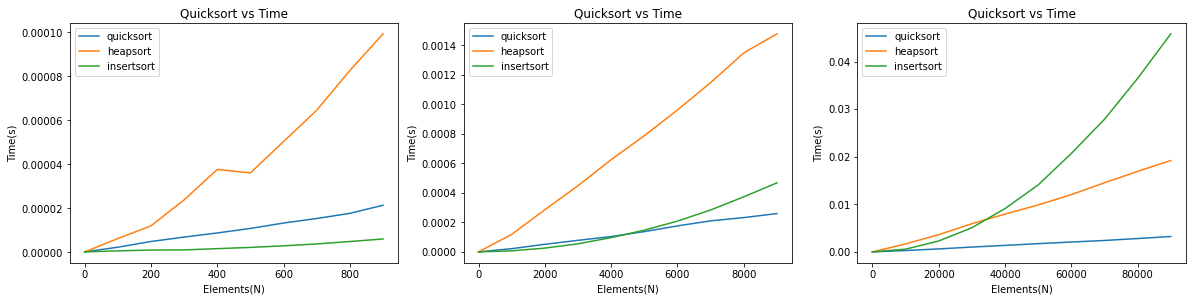

In [75]:
sum = np.loadtxt('quicksort_3_5.csv', delimiter=',') # Get all results from quick sort test.
X = sum[:,0:1] # Reoder the columns.
y = sum[:,1:]

sum = np.loadtxt('heapsort_3_5.csv', delimiter=',') # Get all results from heap sort test.
Xh = sum[:,0:1] # Reoder the columns.
yh = sum[:,1:]

sum = np.loadtxt('insertsort_3_5.csv', delimiter=',') # Get all results from insert sort test.
Xi = sum[:,0:1] # Reoder the columns.
yi = sum[:,1:]

plt.figure(figsize=(20, 15))
nums = 1
for alpha in range(10, 40, 10): 
    plt.subplot(3, 3,nums)        # Initialize subplot
    plt.plot(X[alpha:alpha+10,0:1], y[alpha:alpha+10,:], label='quicksort')
    plt.plot(Xh[alpha:alpha+10,0:1], yh[alpha:alpha+10,:],  label='heapsort')
    plt.plot(Xi[alpha:alpha+10,0:1], yi[alpha:alpha+10,:], label='insertsort')
    plt.title('Quicksort vs Time')
    plt.xlabel('Elements(N)')
    plt.ylabel('Time(s)')
    plt.legend()
    nums += 1
plt.show()

The graph above shows measures using elements and time. The cut off "depth" is received by measuring the current sorting method with time. The sorting algorithms used are  quick sort, heap sort and insert sort.

The range varries for each graph. The first one with for N from 0 to 1000. The second one 0 - 10000. And the last one N 0 - 100000.

In the graph we can see that the sorting time increases with the size of the array.

When it comes to small-sized arrays insert sort is clearly the winner. In the graph we can see that insert sort almost has the computation time of O(1) for small arrays. Insert sort dominates until we surpass an array length larger than 5000.

Theoretically quick sort should be the one dominating in time for larger arrays since the time complexity is O(nlog(n)). And this can be seen by studying the last graph. On the third graph we can clearly see that quick sort is the on that dominates in time. The quick sort graph does almost not move at all after surpassing arrays of the size 5000.

Quick sort must sometimes do some unnecessary tasks before the sortation begins. This can for example be finding the pivot of three elements. Steps like this may be unnecessary for small arrays, where pivots can be easily found without any overdoing. Also the recursion/partition steps can be unnecessary for smaller array, since some arrays are already sorted and partition may not be needed.

When it comes to heap sort, my quick sort and insert sort was always faster no matter the size of the array. My heap sort seemed to perfrom in the the time complexity of O(n), though it should theoretically perform O(nlog(n)), it should still be slower than quick sort and insert sort due to the operations needed before the sortation begins.

By studying the graphs above we can learn that quck sort is not always faster than insrt sort. Insert sort is almost always faster for smaller arrays and Quick sort for larger. Therefore we may need to trigger insert sort when we are working with arrays of smaller sizes. This is done with a so called "depth"- parameter in this exercise. More about it under here.

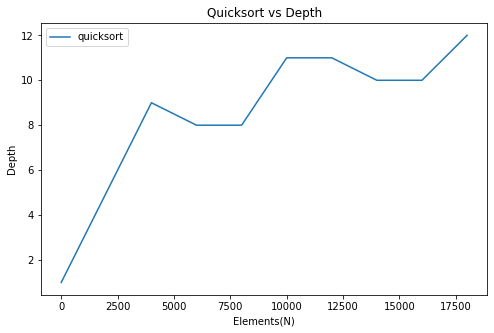

In [76]:
sum = np.loadtxt('quicksort_3_5_depth.csv', delimiter=',') # Get all results from quick sort test.
X = sum[:,0:1] # Reoder the columns.
y = sum[:,1:]
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='quicksort')
plt.title('Quicksort vs Depth')
plt.xlabel('Elements(N)')
plt.ylabel('Depth')
plt.legend()


When it comes to depth, i noticed that the program always crashed when the depth surpassed the "-Xss"-Vm aragument. This argument is used to increase the stack size. So the crash may occur because of RAM-usage limit, or a recursion boundary in Java. So I would say that the ideal depth to switch to insert Sort or heap Sort should be a depth that currently running divce can handle.

Another notation is that Insert sort performs much faster than both heap-and quick sort when it comes to small arrays as stated above. 
Therefore a parameter that trigger insert sort should  be a good thing to have. In order to find a good value for triggering insert sort with a depth parameter I had to compute current operated elements N with depth.

From the graphs above we learned that Quick sort supasses Insert sort after around 5000 elements. By measuring the depth around 5000 elements we came up to a value that may be used as a cut off for triggering Quick sort. The estimated value is around 8-10. This means that if the max depth parameter is above 10, Quick sort should be used instead. This can also be seen in the graph above where the depth is arund 10 for elements around 5000. Arrays with less elements than 5000 require a lower depth, and insert sort is therefore used there. 

So finally we should say that my quick sort should be used in between a range of depth or array size. If we are working with arrays that surpasses this cut off then other sorting algorithms such as insert sort may be more ideal to use. It is also important to have a clue of how sorted the data we wanna sort is since Quick sort can perform very bad for already sorted data.

This experiment led to that a check was created in the Quick sort algorithm. 
"if(maxDepth < 10 || unsorted.length > 5000)", this check checks if the manual set maxDepth is less then 10, or if the length of the unsorted array is above 5000. 

If one of these to conditions are fullfilled quick sort will be used, if not then insert sort is the preferred one.